In [70]:
# Import the standard libraries
import os #File management library
import pandas as pd #Python Data Analysis 
import numpy as np #Numeric and Scientific Computation
import matplotlib.pyplot as plt #Visualisation

#Import project relevant libraries
import matplotlib_venn as vn #venn diagrams

#Global Matlibplot styles
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams.update({'font.family': 'calibri'})
plt.rcParams.update({'font.size': 12})

In [71]:
#set working directory
directory_path = r'C:\\Users\\jrst1\\Documents\\Python\\Venns\\Data'

#load input data
def load_csv(directory_path,suffix='.csv' ):
    filenames = os.listdir(directory_path)
    print("Datasets loaded:")
    for name in filenames:
        globals()[name.replace('.csv','')]= pd.read_csv(directory_path+'\\'+name)
        print(name.replace('.csv',''))

load_csv(directory_path)

Datasets loaded:
example_data


In [72]:
dataset=example_data
groups=("Group 1", "Group 2", "Group 3")
name="example_data"

#to do:
# comment
#tidy up
#macroise
#save pictures

In [73]:
venn_data = pd.DataFrame(dataset)
venn_data=venn_data.sort_values([venn_data.columns.values[2],venn_data.columns.values[1],venn_data.columns.values[0]])
#venn_data

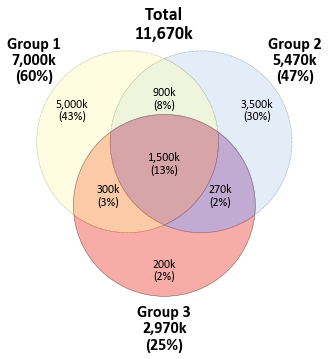

In [74]:
fig = plt.figure(figsize = (9.1,5.3))
ax = fig.add_subplot(1,1,1)

sets=venn_data[venn_data.columns.values[3]]
a_total=sum(venn_data.loc[(venn_data[venn_data.columns.values[0]] == 1)][venn_data.columns.values[3]])
b_total=sum(venn_data.loc[(venn_data[venn_data.columns.values[1]] == 1)][venn_data.columns.values[3]])
c_total=sum(venn_data.loc[(venn_data[venn_data.columns.values[2]] == 1)][venn_data.columns.values[3]])
total=sum(venn_data[venn_data.columns.values[3]])
abc_label=(groups[0]+"\n"+ "{:,.0f}k".format(a_total/1000) + "\n" + "({:,.0f}%)".format(100*a_total/sum(sets))
           , groups[1]+"\n"+ "{:,.0f}k".format(b_total/1000) + "\n" + "({:,.0f}%)".format(100*b_total/sum(sets))
           , groups[2]+"\n"+ "{:,.0f}k".format(c_total/1000) + "\n" + "({:,.0f}%)".format(100*c_total/sum(sets))
           )

# Line style: can be 'dashed' or 'dotted' for example
v=vn.venn3_unweighted(subsets = sets
                      , set_labels = abc_label
                      , subset_label_formatter= lambda x: "{:,.0f}k".format(x/1000) + "\n" + "({:,.0f}%)".format(100*x/sum(sets))
                     )
c=vn.venn3_circles(subsets = (1, 1 ,1 ,1, 1, 1,1), linewidth=0.5, color="#737373", linestyle="dotted")

v.get_patch_by_id('100').set_color('#fffcb5')
v.get_patch_by_id('010').set_color('#B9D1EC')
v.get_patch_by_id('110').set_color('#D9E4A8')
v.get_patch_by_id('001').set_color('#EE3026')
v.get_patch_by_id('101').set_color('#F67B21')
v.get_patch_by_id('011').set_color('#652D90')
v.get_patch_by_id('111').set_color('#9D1E26')
c[2].set_ls("solid")

for text in v.set_labels:
    text.set_horizontalalignment('center')
    text.set_size(16)
    text.set_weight('bold')
    
x1, y1 = v.get_label_by_id("A").get_position()
x2, y2 = v.get_label_by_id("B").get_position()
x3, y3 = v.get_label_by_id("C").get_position()
labelparameter_top= max(max(v.get_patch_by_id('A').get_path().vertices[:,1]), max(v.get_patch_by_id('B').get_path().vertices[:,1]), max(v.get_patch_by_id('C').get_path().vertices[:,1]))
labelparameter_bottom= min(min(v.get_patch_by_id('A').get_path().vertices[:,1]), min(v.get_patch_by_id('B').get_path().vertices[:,1]), min(v.get_patch_by_id('C').get_path().vertices[:,1]))
labelparameter_left= min(min(v.get_patch_by_id('A').get_path().vertices[:,0]), min(v.get_patch_by_id('B').get_path().vertices[:,0]), min(v.get_patch_by_id('C').get_path().vertices[:,0]))
labelparameter_right= max(max(v.get_patch_by_id('A').get_path().vertices[:,0]), max(v.get_patch_by_id('B').get_path().vertices[:,0]), max(v.get_patch_by_id('C').get_path().vertices[:,0]))
  
v.get_label_by_id('A').set_position((labelparameter_left, labelparameter_top-0.15))
v.get_label_by_id('B').set_position((labelparameter_right, labelparameter_top-0.15))
v.get_label_by_id('C').set_position((x3, y3))

plt.title("Total" + "\n" + "{:,.0f}k".format(total/1000), weight='bold', size=18, y=0.95)

plt.savefig(r'C:\\Users\\jrst1\\Documents\\Python\\Venns\\Outputs' + '\\' + name+ ' unweighted' + '.png', format='png', dpi=1000)

    
plt.show()

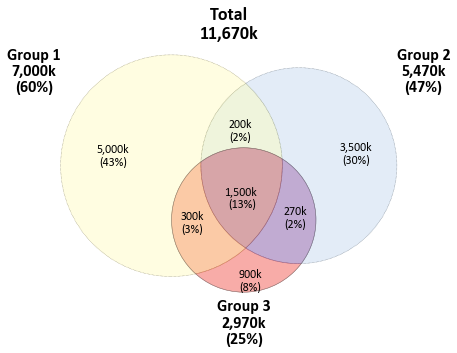

In [75]:
fig = plt.figure(figsize = (9.1,5.3))
ax = fig.add_subplot(1,1,1)

sets=venn_data[venn_data.columns.values[3]]
a_total=sum(venn_data.loc[(venn_data[venn_data.columns.values[0]] == 1)][venn_data.columns.values[3]])
b_total=sum(venn_data.loc[(venn_data[venn_data.columns.values[1]] == 1)][venn_data.columns.values[3]])
c_total=sum(venn_data.loc[(venn_data[venn_data.columns.values[2]] == 1)][venn_data.columns.values[3]])
total=sum(venn_data[venn_data.columns.values[3]])
abc_label=(groups[0]+"\n"+ "{:,.0f}k".format(a_total/1000) + "\n" + "({:,.0f}%)".format(100*a_total/sum(sets))
           , groups[1]+"\n"+ "{:,.0f}k".format(b_total/1000) + "\n" + "({:,.0f}%)".format(100*b_total/sum(sets))
           , groups[2]+"\n"+ "{:,.0f}k".format(c_total/1000) + "\n" + "({:,.0f}%)".format(100*c_total/sum(sets))
           )


v=vn.venn3(subsets = sets
           , set_labels = abc_label
           , subset_label_formatter= lambda x: "{:,.0f}k".format(x/1000) + "\n" + "({:,.0f}%)".format(100*x/sum(sets))
          )
c=vn.venn3_circles(subsets = sets, linewidth=0.5, color="#737373", linestyle="dotted")

v.get_patch_by_id('100').set_color('#fffcb5')
v.get_patch_by_id('010').set_color('#B9D1EC')
v.get_patch_by_id('110').set_color('#D9E4A8')
v.get_patch_by_id('001').set_color('#EE3026')
v.get_patch_by_id('101').set_color('#F67B21')
v.get_patch_by_id('011').set_color('#652D90')
v.get_patch_by_id('111').set_color('#9D1E26')
c[2].set_ls("solid")

for text in v.set_labels:
    text.set_horizontalalignment('center')
    text.set_size(16)
    text.set_weight('bold')

x1, y1 = v.get_label_by_id("A").get_position()
x2, y2 = v.get_label_by_id("B").get_position()
x3, y3 = v.get_label_by_id("C").get_position()
labelparameter_bottom= min(min(v.get_patch_by_id('A').get_path().vertices[:,1]), min(v.get_patch_by_id('B').get_path().vertices[:,1]), min(v.get_patch_by_id('C').get_path().vertices[:,1]))
labelparameter_top= max(max(v.get_patch_by_id('A').get_path().vertices[:,1]), max(v.get_patch_by_id('B').get_path().vertices[:,1]), max(v.get_patch_by_id('C').get_path().vertices[:,1]))
labelparameter_left= min(min(v.get_patch_by_id('A').get_path().vertices[:,0]), min(v.get_patch_by_id('B').get_path().vertices[:,0]), min(v.get_patch_by_id('C').get_path().vertices[:,0]))
labelparameter_right= max(max(v.get_patch_by_id('A').get_path().vertices[:,0]), max(v.get_patch_by_id('B').get_path().vertices[:,0]), max(v.get_patch_by_id('C').get_path().vertices[:,0]))

x111 = (min(v.get_patch_by_id('111').get_path().vertices[:,0])+max(v.get_patch_by_id('111').get_path().vertices[:,0]))/2
y111 = (min(v.get_patch_by_id('111').get_path().vertices[:,1])+max(v.get_patch_by_id('111').get_path().vertices[:,1]))/2

v.get_label_by_id('A').set_position((labelparameter_left-0.1, labelparameter_top-0.15))
v.get_label_by_id('B').set_position((labelparameter_right+0.1, labelparameter_top-0.15))
v.get_label_by_id('C').set_position((x3, min(labelparameter_bottom-0.05,y3)))

v.get_label_by_id('111').set_position((x111, y111))


plt.title("Total" + "\n" + "{:,.0f}k".format(total/1000), weight='bold', size=18, y=0.95)

plt.savefig(r'C:\\Users\\jrst1\\Documents\\Python\\Venns\\Outputs' + '\\' + name+ ' Weighted' + '.png', format='png', dpi=1000)

plt.show()

In [76]:
min(v.get_patch_by_id('A').get_path().vertices[:,1])


-0.4016180779799786

In [77]:
min(v.get_patch_by_id('B').get_path().vertices[:,1])


-0.344985908951013

In [78]:
min(v.get_patch_by_id('C').get_path().vertices[:,1])

0.05640349508090474